<a href="https://colab.research.google.com/github/kanishkagargg/Web-Scrapping-Project/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. This project include scrapping movie and TV show data from JustWatch using Python, and BeautifulSoup, filtering and analysis using Pandas, and finally, saving the results to a CSV file.










# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2018'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
movie_link = []
urls = soup.find_all('a', class_= "title-list-grid__item--link")
for url in urls:
  movie_link.append(url.get('href'))                                 #to get href attribute using scrapping

movie_link
Movie_urls = []
for url in movie_link:
  u = "https://www.justwatch.com" + url                              # adding "https://www.justwatch.com" to make the working links
  Movie_urls.append(u)

Movie_urls

['https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/salaar',
 'https://www.justwatch.com/in/movie/sam-bahadur',
 'https://www.justwatch.com/in/movie/tiger-3',
 'https://www.justwatch.com/in/movie/nani30',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom',
 'https://www.justwatch.com/in/movie/mission-impossible-7',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/dunki',
 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon',
 'https://www.justwatch.com/in/movie/parking-2023',
 'https://www.justwatch.com/in/movie/devil-2023',
 'https://www.justwatch.com/in/movie/jawan',
 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b',
 'https://www.justwatch.com/in/movie/the-kerala-story',
 'https://www.justwatch.com/in/movie/guthlee-ladoo',
 'https://www.justwatch.com/in/movie/kaathal-t

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here

# I have used URL links to get the name
titles = []
for url in Movie_urls:
  title = url.split('/')[-1]                # to get name present after the last '/'
  x = title.replace("-", " ")               # replacing - with a space
  y = x.title()                             # to make name into a proper title
  titles.append(y)

titles

['12Th Fail',
 'Animal 2022',
 'Salaar',
 'Sam Bahadur',
 'Tiger 3',
 'Nani30',
 'Oppenheimer',
 'Aquaman And The Lost Kingdom',
 'Mission Impossible 7',
 'Hanu Man',
 'Dunki',
 'Killers Of The Flower Moon',
 'Parking 2023',
 'Devil 2023',
 'Jawan',
 'Sapta Sagaradaache Ello Side B',
 'The Kerala Story',
 'Guthlee Ladoo',
 'Kaathal The Core',
 'Society Of The Snow',
 'Barbie 2023',
 'Lift 0',
 'Anatomie Dune Chute',
 'The Marvels',
 'Fighter 2022',
 'The Beekeeper 2024',
 'Anyone But You',
 'Poor Things',
 'Neru',
 'Saltburn',
 'Talk To Me 2022',
 'Napoleon 2023',
 'Ssmb 28',
 'Mangalavaram',
 'Past Lives',
 'Migration',
 'Joram',
 'The Family Plan',
 'Leo 2023',
 'Kho Gaye Hum Kahan',
 'Jigarthanda Doublex',
 'Merry Christmas 2024',
 'Saindhav',
 'Chittha',
 'Rocky Aur Rani Ki Prem Kahani',
 '777 Charlie',
 'Joe 2023',
 'Three Of Us',
 'The Holdovers',
 'Dada 2023',
 '365 Days',
 'Extra',
 'Wonka',
 'Zara Hatke Zara Bach Ke',
 'Role Play 2023',
 'Annapoorani',
 'Tejas',
 'Antony 2023'

## **Scrapping release Year**

In [ ]:
# Write Your Code here
years = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # scrapping using span tag
  year = soup.find('span', class_ = 'text-muted').text
  years.append(year)

years

[' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2022) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2020) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2018) ',
 ' (2023) ',
 ' (2023) ',
 ' (2022) ',
 ' (2019) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2024) ',
 ' (2023) ',
 ' (2023) ',
 ' (2019) ',
 ' (2023) ',
 ' (2021) ',
 ' (2023) ',

In [ ]:
# replaced () with space and then removed extra whitespaces
release_years = []
for year in years:
  x = year.replace("(", " ").replace(")", " ")
  y = x.strip()
  release_years.append(y)

release_years

['2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2023',
 '2022',
 '2023',
 '2023',
 '2023',
 '2023',
 '2020',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2018',
 '2023',
 '2023',
 '2022',
 '2019',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2023',
 '2019',
 '2023',
 '2021',
 '2023',
 '2018',
 '2021',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2018',
 '2022',
 '2024',
 '2023',
 '2020',
 '2022',
 '2023',
 '2018',
 '2022',
 '2023',
 '2023',
 '2023',
 '2023',
 '2022',
 '2023',
 '2023']

## **Scrapping Genres**

In [ ]:
# Write Your Code here
genres = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Genres and them find its next sibling of div with associated classes
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Genres')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    genres.append(tag2.text)

genres

<ipython-input-12-1798ed5cec23>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Genres')


['Drama',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'War & Military, Drama, History',
 'Action & Adventure, Mystery & Thriller',
 'Romance, Drama, Kids & Family',
 'Drama, History',
 'Action & Adventure, Fantasy, Science-Fiction',
 'Action & Adventure, Mystery & Thriller',
 'Fantasy, Action & Adventure, Comedy, Science-Fiction',
 'Drama, Comedy',
 'Drama, History, Romance, Western, Crime',
 'Mystery & Thriller, Drama',
 'Mystery & Thriller, Drama, Action & Adventure',
 'Action & Adventure, Mystery & Thriller',
 'Drama, Romance',
 'Drama',
 'Drama',
 'Drama, Crime',
 'Drama, History, Mystery & Thriller',
 'Fantasy, Comedy',
 'Crime, Action & Adventure, Drama, Mystery & Thriller, Comedy',
 'Drama, Mystery & Thriller, Crime',
 'Science-Fiction, Action & Adventure, Fantasy',
 'Mystery & Thriller, Action & Adventure, War & Military',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Comedy, Romance',
 'Romance, Comed

## **Scrapping IMBD Rating**

In [ ]:
ratings = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all div tag, then find all img tags and at last finded next sibling of img with associated attributes
  for div in soup.find_all('div', class_ = 'detail-infos__value'):
    for img in div.find_all('img', alt = 'IMDB'):
      try:
        for rat in img.find_next_sibling('span'):
          ratings.append(rat.text)
      except:
        ratings.append('No details given.')

ratings

[' 9.2  (93k) ',
 ' 9.2  (93k) ',
 ' 6.4  (76k) ',
 ' 6.4  (76k) ',
 ' 6.6  (57k) ',
 ' 6.6  (57k) ',
 ' 7.9  (11k) ',
 ' 7.9  (11k) ',
 ' 5.8  (51k) ',
 ' 5.8  (51k) ',
 ' 8.2  (12k) ',
 ' 8.2  (12k) ',
 ' 8.4  (624k) ',
 ' 8.4  (624k) ',
 ' 5.7  (49k) ',
 ' 5.7  (49k) ',
 ' 7.7  (223k) ',
 ' 7.7  (223k) ',
 ' 8.5  (16k) ',
 ' 8.5  (16k) ',
 ' 7.2  (62k) ',
 ' 7.2  (62k) ',
 ' 7.7  (191k) ',
 ' 7.7  (191k) ',
 ' 7.9  (8k) ',
 ' 7.9  (8k) ',
 ' 6.7  (2k) ',
 ' 6.7  (2k) ',
 ' 7.0  (90k) ',
 ' 7.0  (90k) ',
 ' 8.1  (2k) ',
 ' 8.1  (2k) ',
 ' 7.1  (66k) ',
 ' 7.1  (66k) ',
 ' 7.7  ',
 ' 7.7  ',
 ' 7.6  (2k) ',
 ' 7.6  (2k) ',
 ' 7.9  (87k) ',
 ' 7.9  (87k) ',
 ' 6.9  (484k) ',
 ' 6.9  (484k) ',
 ' 5.5  (29k) ',
 ' 5.5  (29k) ',
 ' 7.8  (56k) ',
 ' 7.8  (56k) ',
 ' 7.5  (33k) ',
 ' 7.5  (33k) ',
 ' 6.5  (35k) ',
 ' 6.5  (35k) ',
 ' 6.7  (17k) ',
 ' 6.7  (17k) ',
 ' 8.4  (70k) ',
 ' 8.4  (70k) ',
 ' 7.7  (4k) ',
 ' 7.7  (4k) ',
 ' 7.1  (128k) ',
 ' 7.1  (128k) ',
 ' 6.4  (104k) ',
 ' 6.4  

In [ ]:
# we saw duplicated entries were there for every movie. Hence, used indexing method
ratings_new = []
ratings_new.append(ratings[::2])

In [ ]:
# to extract only ratings
ratings_new1 = []
for i in ratings_new[0]:
  ratings_new1.append(i[1:4])

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtimes = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Runtime and them find its next sibling of div with associated classes
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Runtime')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    runtimes.append(tag2.text)

runtimes

<ipython-input-16-440c3780c49f>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Runtime')


['2h 26min',
 '3h 21min',
 '2h 55min',
 '2h 30min',
 '2h 35min',
 '2h 35min',
 '3h 1min',
 '2h 4min',
 '2h 44min',
 '2h 39min',
 '2h 40min',
 '3h 26min',
 '2h 7min',
 '2h 24min',
 '2h 49min',
 '2h 28min',
 '2h 18min',
 '1h 45min',
 '1h 52min',
 '2h 24min',
 '1h 54min',
 '1h 46min',
 '2h 32min',
 '1h 45min',
 '2h 47min',
 '1h 45min',
 '1h 43min',
 '2h 21min',
 '2h 30min',
 '2h 11min',
 '1h 35min',
 '2h 38min',
 '2h 39min',
 '2h 25min',
 '1h 46min',
 '1h 23min',
 '1h 59min',
 '1h 59min',
 '2h 43min',
 '2h 15min',
 '2h 52min',
 '2h 24min',
 '2h 18min',
 '2h 20min',
 '2h 48min',
 '2h 46min',
 '2h 27min',
 '1h 39min',
 '2h 13min',
 '2h 15min',
 '1h 54min',
 '2h 35min',
 '1h 57min',
 '2h 20min',
 '1h 41min',
 '2h 26min',
 '1h 52min',
 '2h 27min',
 '2h 14min',
 '2h 8min',
 '2h 48min',
 '1h 59min',
 '2h 23min',
 '2h 33min',
 '1h 45min',
 '2h 55min',
 '2h 2min',
 '2h 38min',
 '1h 54min',
 '1h 49min',
 '2h 37min',
 '2h 22min',
 '2h 5min',
 '2h 18min',
 '2h 28min',
 '2h 35min',
 '2h 4min',
 '2h 1

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_ratings = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Age ratings and them find its next sibling of div with associated classes. If age rating is not given, except block will work.
  try:
    tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Age rating')
    for tag in tags:
      tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
      age_ratings.append(tag2.text)
  except:
    age_ratings.append('Age ratings is not given')

age_ratings

<ipython-input-18-ab74d7dfffbd>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Age rating')


['Age ratings is not given',
 'A',
 'A',
 'UA',
 'Age ratings is not given',
 'U',
 'UA',
 'Age ratings is not given',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'A',
 'UA',
 'Age ratings is not given',
 'UA',
 'UA',
 'A',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'UA',
 'A',
 'UA',
 'Age ratings is not given',
 'UA',
 'UA',
 'UA',
 'UA',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'U',
 'Age ratings is not given',
 'Age ratings is not given',
 'U',
 'UA',
 'Age ratings is not given',
 'UA',
 'Age ratings is not g

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
countries = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Production country and them find its next sibling of div with associated classes.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text=' Production country ')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    countries.append(tag2.text)

countries

<ipython-input-20-8c20e26f7495>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text=' Production country ')


['India',
 'India, United States',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Spain, United States',
 'United States, United Kingdom',
 'United States',
 'France',
 'United States',
 'India',
 'United Kingdom, United States',
 'United States, Australia',
 'Ireland, United Kingdom, United States',
 'India',
 'United Kingdom, United States',
 'United Kingdom, Australia',
 'United Kingdom, United States',
 'India',
 'India',
 'United States, South Korea',
 'France, United States, Canada',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'Poland',
 'India',
 'United Kingdom, United States',
 'India',
 'France, Germany, United States',
 'India',
 'India',
 'India',
 'Canada, United States',
 'United States',
 '

## **Fetching Streaming Service Details**

In [ ]:
provider = []
for url in Movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all picture tag and them finding img with associated classes from first picture tag. iF not info will be given, except block will execute.
  picture = []
  picture = soup.find_all('picture', class_ = 'picture-wrapper')
  try:
    img = picture[0].find('img', class_ = 'offer__icon')
    provider.append(img['alt'])
  except:
     provider.append('No details given.')

provider

['Bookmyshow',
 'Netflix',
 'Netflix',
 'Zee5',
 'Amazon Prime Video',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'No details given.',
 'Bookmyshow',
 'Apple TV Plus',
 'No details given.',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'No details given.',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Apple TV',
 'Netflix',
 'No details given.',
 'Apple TV',
 'No details given.',
 'Bookmyshow',
 'Bookmyshow',
 'No details given.',
 'Hotstar',
 'No details given.',
 'Apple TV',
 'Apple TV',
 'Bookmyshow',
 'Bookmyshow',
 'Lionsgate Play',
 'No details given.',
 'Amazon Video',
 'Apple TV Plus',
 'Netflix',
 'Netflix',
 'Netflix',
 'No details given.',
 'Amazon Prime Video',
 'Hotstar',
 'Amazon Prime Video',
 'Voot',
 'No details given.',
 'Netflix',
 'No details given.',
 'Amazon Prime Video',
 'Netflix',
 'No details given.',
 'Apple TV',
 'No details given.',
 'Amazon Prime Video',
 'No details given.',
 'No details given.',
 'Amazon Prime Video',

In [ ]:
# replacing Bookmyshow with "Movie is available only in cinemas" as it is not a streaming platform
new_streamimg_list = [sub.replace('Bookmyshow', 'Movie is available only in cinemas') for sub in provider]
new_streamimg_list

['Movie is available only in cinemas',
 'Netflix',
 'Netflix',
 'Zee5',
 'Amazon Prime Video',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'No details given.',
 'Movie is available only in cinemas',
 'Apple TV Plus',
 'No details given.',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'No details given.',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Apple TV',
 'Netflix',
 'No details given.',
 'Apple TV',
 'No details given.',
 'Movie is available only in cinemas',
 'Movie is available only in cinemas',
 'No details given.',
 'Hotstar',
 'No details given.',
 'Apple TV',
 'Apple TV',
 'Movie is available only in cinemas',
 'Movie is available only in cinemas',
 'Lionsgate Play',
 'No details given.',
 'Amazon Video',
 'Apple TV Plus',
 'Netflix',
 'Netflix',
 'Netflix',
 'No details given.',
 'Amazon Prime Video',
 'Hotstar',
 'Amazon Prime Video',
 'Voot',
 'No details given.',
 'Netflix',
 'No details given.',
 'Amazon Prime Video',
 'Netflix',
 '

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movies_dict = {
    'Movie Title': titles[:50],
    'Movie Url': Movie_urls[:50],
    'Release Year': release_years[:50],
    'Movie Genres': genres[:50],
    'Movie IMDb Ratings': ratings_new1[0:50],
    'Movie Runtime': runtimes[:50],
    'Movie Age Rating': age_ratings[:50],
    'Movie Production Countries': countries[:50],
    'Movie Streaming Service': new_streamimg_list[:50]
}
# creating dataframe from first 50 entries
movies_data = pd.DataFrame(movies_dict)
movies_data

,Movie Title,Movie Url,Release Year,Movie Genres,Movie IMDb Ratings,Movie Runtime,Movie Age Rating,Movie Production Countries,Movie Streaming Service
0,12Th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.2,2h 26min,Age ratings is not given,India,Movie is available only in cinemas
1,Animal 2022,https://www.justwatch.com/in/movie/animal-2022,2023,"Drama, Action & Adventure, Crime, Mystery & Th...",6.4,3h 21min,A,"India, United States",Netflix
2,Salaar,https://www.justwatch.com/in/movie/salaar,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,2h 55min,A,India,Netflix
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"War & Military, Drama, History",7.9,2h 30min,UA,India,Zee5
4,Tiger 3,https://www.justwatch.com/in/movie/tiger-3,2023,"Action & Adventure, Mystery & Thriller",5.8,2h 35min,Age ratings is not given,India,Amazon Prime Video
5,Nani30,https://www.justwatch.com/in/movie/nani30,2023,"Romance, Drama, Kids & Family",8.2,2h 35min,U,India,Netflix
6,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"Drama, History",8.4,3h 1min,UA,"United Kingdom, United States",Apple TV
7,Aquaman And The Lost Kingdom,https://www.justwatch.com/in/movie/aquaman-and...,2023,"Action & Adventure, Fantasy, Science-Fiction",5.7,2h 4min,Age ratings is not given,United States,Apple TV
8,Mission Impossible 7,https://www.justwatch.com/in/movie/mission-imp...,2023,"Action & Adventure, Mystery & Thriller",7.7,2h 44min,Age ratings is not given,United States,Apple TV
9,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",8.5,2h 39min,UA,India,No details given.


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2018'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_link = []
urls = soup.find_all('a', class_= "title-list-grid__item--link")
for url in urls:
  tv_link.append(url.get('href'))                                  #to get href attribute using scrapping

tvshows_urls = []
for url in tv_link:
  u = "https://www.justwatch.com" + url                             # adding "https://www.justwatch.com" to make the working links
  tvshows_urls.append(u)

tvshows_urls

['https://www.justwatch.com/in/tv-show/jack-reacher',
 'https://www.justwatch.com/in/tv-show/indian-police-force',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman',
 'https://www.justwatch.com/in/tv-show/death-and-other-details',
 'https://www.justwatch.com/in/tv-show/killer-soup',
 'https://www.justwatch.com/in/tv-show/berlin',
 'https://www.justwatch.com/in/tv-show/yellowstone',
 'https://www.justwatch.com/in/tv-show/maharani-2021',
 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen',
 'https://www.justwatch.com/in/tv-show/the-last-of-us',
 'https://www.justwatch.com/in/tv-show/farzi',
 'https://www.justwatch.com/in/tv-show/the-bear',
 'https://www.justwatch.com/in/tv-show/the-freelancer',
 'https://www.justwatch.com/in/tv-show/monarch-legacy-of-monsters',
 'https://www.justwatch.com/in/tv-show/my-demon',
 'ht

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# I have used URL links to get the name
titles_tv = []
for url in tvshows_urls:
  title = url.split('/')[-1]                 # to get name present after the last '/'
  x = title.replace("-", " ")                # replacing - with a space
  y = x.title()                              # to make name into a proper title
  titles_tv.append(y)

titles_tv

['Jack Reacher',
 'Indian Police Force',
 'Mirzapur',
 'Solo Leveling 2024',
 'Panchayat',
 'The Legend Of Hanuman',
 'Death And Other Details',
 'Killer Soup',
 'Berlin',
 'Yellowstone',
 'Maharani 2021',
 'Jujutsu Kaisen',
 'The Last Of Us',
 'Farzi',
 'The Bear',
 'The Freelancer',
 'Monarch Legacy Of Monsters',
 'My Demon',
 'Marry My Husband',
 'Succession',
 'Superman And Lois',
 'Fool Me Once',
 'Mr And Mrs Smith',
 'Aashram',
 'Ek Thi Begum',
 'Griselda',
 'Mastram',
 'Loki',
 'The Railway Men The Untold Story Of Bhopal 1984',
 'Deaths Game',
 'Gandii Baat',
 'What If 2021',
 'Flames',
 'Percy Jackson And The Olympians',
 'Gullak',
 'Masters Of The Air',
 'Taaza Khabar',
 'Echo',
 'The Family Man',
 'Scam 1992',
 'Ted',
 'Asur',
 'Aarya',
 'Euphoria',
 'Perilloor Premier League',
 'Dehati Ladke',
 'Shark Tank India',
 'Aspirants',
 'Scam 2003 The Telgi Story',
 'Dark Desire',
 'Expats',
 'Love Never Lies Poland',
 'Detective Forst',
 'The Brothers Sun',
 'House Of The Dragon',


## **Fetching Release Year**

In [ ]:
# Write Your Code here
years_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # scrapping using span tag
  year = soup.find('span', class_ = 'text-muted').text
  years_tv.append(year)

years_tv

[' (2022) ',
 ' (2024) ',
 ' (2018) ',
 ' (2024) ',
 ' (2020) ',
 ' (2021) ',
 ' (2024) ',
 ' (2024) ',
 ' (2023) ',
 ' (2018) ',
 ' (2021) ',
 ' (2020) ',
 ' (2023) ',
 ' (2023) ',
 ' (2022) ',
 ' (2023) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2018) ',
 ' (2021) ',
 ' (2024) ',
 ' (2024) ',
 ' (2020) ',
 ' (2020) ',
 ' (2024) ',
 ' (2020) ',
 ' (2021) ',
 ' (2023) ',
 ' (2023) ',
 ' (2018) ',
 ' (2021) ',
 ' (2018) ',
 ' (2023) ',
 ' (2019) ',
 ' (2024) ',
 ' (2023) ',
 ' (2024) ',
 ' (2019) ',
 ' (2020) ',
 ' (2024) ',
 ' (2020) ',
 ' (2020) ',
 ' (2019) ',
 ' (2024) ',
 ' (2023) ',
 ' (2021) ',
 ' (2021) ',
 ' (2023) ',
 ' (2020) ',
 ' (2024) ',
 ' (2022) ',
 ' (2024) ',
 ' (2024) ',
 ' (2022) ',
 ' (2024) ',
 ' (2019) ',
 ' (2023) ',
 ' (2023) ',
 ' (2024) ',
 ' (2023) ',
 ' (2024) ',
 ' (2023) ',
 ' (2019) ',
 ' (2018) ',
 ' (2020) ',
 ' (2018) ',
 ' (2023) ',
 ' (2022) ',
 ' (2022) ',
 ' (2018) ',
 ' (2023) ',
 ' (2024) ',
 ' (2018) ',
 ' (2019) ',
 ' (2024) ',
 ' (2023) ',

In [ ]:
# replaced () with space and then removed extra whitespaces
release_years_tv = []
for year in years_tv:
  x = year.replace("(", " ").replace(")", " ")
  y = x.strip()
  release_years_tv.append(y)

release_years_tv

['2022',
 '2024',
 '2018',
 '2024',
 '2020',
 '2021',
 '2024',
 '2024',
 '2023',
 '2018',
 '2021',
 '2020',
 '2023',
 '2023',
 '2022',
 '2023',
 '2023',
 '2023',
 '2024',
 '2018',
 '2021',
 '2024',
 '2024',
 '2020',
 '2020',
 '2024',
 '2020',
 '2021',
 '2023',
 '2023',
 '2018',
 '2021',
 '2018',
 '2023',
 '2019',
 '2024',
 '2023',
 '2024',
 '2019',
 '2020',
 '2024',
 '2020',
 '2020',
 '2019',
 '2024',
 '2023',
 '2021',
 '2021',
 '2023',
 '2020',
 '2024',
 '2022',
 '2024',
 '2024',
 '2022',
 '2024',
 '2019',
 '2023',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2019',
 '2018',
 '2020',
 '2018',
 '2023',
 '2022',
 '2022',
 '2018',
 '2023',
 '2024',
 '2018',
 '2019',
 '2024',
 '2023',
 '2019',
 '2023',
 '2020',
 '2021',
 '2021',
 '2022',
 '2019',
 '2023',
 '2022',
 '2023',
 '2020',
 '2023',
 '2022',
 '2023',
 '2024',
 '2024',
 '2023',
 '2022',
 '2019',
 '2020',
 '2021',
 '2024',
 '2021']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
genres_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Genres and them find its next sibling of div with associated classes
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Genres')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    genres_tv.append(tag2.text)

genres_tv

<ipython-input-31-563c981854d0>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Genres')


['Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Action & Adventure, Crime',
 'Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Animation, Action & Adventure, Fantasy, Science-Fiction',
 'Comedy, Drama',
 'Animation, Action & Adventure, Fantasy',
 'Drama, Crime, Mystery & Thriller',
 'Drama, Mystery & Thriller, Comedy',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Drama, Western',
 'Drama',
 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction',
 'Drama, Mystery & Thriller, Action & Adventure, Horror, Science-Fiction',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Comedy',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Drama, Science-Fiction, Action & Adventure',
 'Science-Fiction, Comedy, Drama, Fantasy, Romance',
 'Drama, Fantasy, Romance, Comedy, Science-Fiction',
 'Drama, Comedy',
 'Science-Fiction, Drama, Romance, Action & Adventure',
 'Mystery & Thriller, Crime, Drama',
 'Drama, Comedy, Action & Adventure, Crime, Myster

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
ratings_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all div tag, then find all img tags and at last finded next sibling of img with associated attributes
  for div in soup.find_all('div', class_ = 'detail-infos__value'):
    for img in div.find_all('img', alt = 'IMDB'):
      try:
        for rat in img.find_next_sibling('span'):
          ratings_tv.append(rat.text)
      except:
        ratings_tv.append('No details given.')

ratings_tv

[' 8.1  (192k) ',
 ' 8.1  (192k) ',
 ' 5.7  (49k) ',
 ' 5.7  (49k) ',
 ' 8.5  (80k) ',
 ' 8.5  (80k) ',
 ' 8.4  (6k) ',
 ' 8.4  (6k) ',
 ' 8.9  (83k) ',
 ' 8.9  (83k) ',
 ' 9.2  (11k) ',
 ' 9.2  (11k) ',
 ' 7.0  (3k) ',
 ' 7.0  (3k) ',
 ' 6.3  (3k) ',
 ' 6.3  (3k) ',
 ' 7.0  (23k) ',
 ' 7.0  (23k) ',
 ' 8.7  (207k) ',
 ' 8.7  (207k) ',
 ' 7.9  (8k) ',
 ' 7.9  (8k) ',
 ' 8.6  (105k) ',
 ' 8.6  (105k) ',
 ' 8.8  (495k) ',
 ' 8.8  (495k) ',
 ' 8.4  (43k) ',
 ' 8.4  (43k) ',
 ' 8.6  (192k) ',
 ' 8.6  (192k) ',
 ' 8.1  (5k) ',
 ' 8.1  (5k) ',
 ' 7.0  (31k) ',
 ' 7.0  (31k) ',
 ' 7.8  (6k) ',
 ' 7.8  (6k) ',
 ' 8.3  (1k) ',
 ' 8.3  (1k) ',
 ' 8.9  (259k) ',
 ' 8.9  (259k) ',
 ' 7.8  (39k) ',
 ' 7.8  (39k) ',
 ' 6.8  (42k) ',
 ' 6.8  (42k) ',
 ' 6.7  (8k) ',
 ' 6.7  (8k) ',
 ' 7.4  (32k) ',
 ' 7.4  (32k) ',
 ' 8.6  (6k) ',
 ' 8.6  (6k) ',
 ' 7.4  (16k) ',
 ' 7.4  (16k) ',
 ' 7.1  (2k) ',
 ' 7.1  (2k) ',
 ' 8.2  (404k) ',
 ' 8.2  (404k) ',
 ' 8.5  (19k) ',
 ' 8.5  (19k) ',
 ' 8.7  (6k) ',
 ' 8

In [ ]:
# we saw duplicated entries were there for every show. Hence, used indexing method
ratings_new_tv = []
ratings_new_tv.append(ratings_tv[::2])

In [ ]:
# to extract only ratings
ratings_final_tv = []
for i in ratings_new_tv[0]:
  ratings_final_tv.append(i[1:4])

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
age_ratings_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Age ratings and them find its next sibling of div with associated classes. If age rating is not given, except block will work.
  try:
    tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Age rating')
    for tag in tags:
      tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
      age_ratings_tv.append(tag2.text)
  except:
    age_ratings_tv.append('Age ratings is not given')

age_ratings_tv

<ipython-input-33-9ce50f7695db>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Age rating')


['A',
 'A',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'UA',
 'Age ratings is not given',
 'A',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'A',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'A',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'A',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',
 'Age ratings is not given',


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
countries_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all h3 tag with text Production country and them find its next sibling of div with associated classes.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text=' Production country ')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    countries_tv.append(tag2.text)

countries_tv

<ipython-input-34-5e1025849b4c>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text=' Production country ')


['United States',
 'India',
 'India',
 'Japan, South Korea',
 'India',
 'India',
 'United States',
 'India',
 'Spain',
 'United States',
 'India',
 'Japan',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'South Korea',
 'South Korea',
 'United States',
 'United States',
 'United Kingdom, United States',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'South Korea',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Mexico',
 'United States',
 'Poland',
 'Poland',
 'United States',
 'United States',
 'United States, United Kingdom',
 'United States',
 'United States',
 'India',
 'Turkey',
 'United States',
 'Japan',
 'Japan',
 'India',
 'India',
 'India',
 'United States',
 'South Korea',
 'United States',
 'South Korea',
 'Ind

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
provider_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  # first finding all picture tag and them finding img with associated classes from first picture tag. iF not info will be given, except block will execute.
  picture_tv = []
  picture_tv = soup.find_all('picture', class_ = 'picture-wrapper')
  try:
    img = picture_tv[0].find('img', class_ = 'offer__icon')
    provider_tv.append(img['alt'])
  except:
     provider_tv.append('No details given.')

provider_tv

['Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Crunchyroll',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Netflix',
 'Netflix',
 'Netflix',
 'Sony Liv',
 'Crunchyroll',
 'Jio Cinema',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Apple TV Plus',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'MX Player',
 'MX Player',
 'Netflix',
 'No details given.',
 'Hotstar',
 'Netflix',
 'Amazon Prime Video',
 'Alt Balaji',
 'Hotstar',
 'Amazon Prime Video',
 'No details given.',
 'Sony Liv',
 'Apple TV Plus',
 'Hotstar',
 'No details given.',
 'Amazon Prime Video',
 'Sony Liv',
 'No details given.',
 'Jio Cinema',
 'Hotstar',
 'Jio Cinema',
 'Hotstar',
 'Amazon miniTV',
 'Sony Liv',
 'Amazon Prime Video',
 'Sony Liv',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Netflix',
 'Jio Cinema',
 'Apple TV Plus',
 'Amazon Prime Video',
 'Lionsgate Play',
 'Netflix',
 'Netflix',
 'Netflix',
 'Crunch

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
runtimes_tv = []
for url in tvshows_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Runtime')
  for tag in tags:
    tag2 = tags.find_next_sibling('div', class_='detail-infos__value')
    runtimes_tv.append(tag2.text)

runtimes_tv

<ipython-input-36-5551a3999008>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find('h3', class_ = 'detail-infos__subheading', text='Runtime')


['48min',
 '38min',
 '36min',
 '23min',
 '33min',
 '21min',
 '47min',
 '51min',
 '48min',
 '50min',
 '44min',
 '23min',
 '58min',
 '56min',
 '33min',
 '50min',
 '46min',
 '1h 6min',
 '1h 2min',
 '1h 4min',
 '42min',
 '48min',
 '49min',
 '43min',
 '30min',
 '55min',
 '28min',
 '49min',
 '59min',
 '51min',
 '44min',
 '32min',
 '31min',
 '39min',
 '29min',
 '51min',
 '29min',
 '42min',
 '45min',
 '52min',
 '40min',
 '47min',
 '45min',
 '58min',
 '37min',
 '24min',
 '56min',
 '44min',
 '44min',
 '34min',
 '1h 11min',
 '49min',
 '43min',
 '55min',
 '1h 2min',
 '45min',
 '1h 1min',
 '53min',
 '1h 2min',
 '44min',
 '56min',
 '24min',
 '23min',
 '31min',
 '31min',
 '34min',
 '43min',
 '1h 9min',
 '49min',
 '1h 59min',
 '24min',
 '35min',
 '52min',
 '48min',
 '57min',
 '26min',
 '44min',
 '26min',
 '47min',
 '1h 13min',
 '49min',
 '1h 12min',
 '36min',
 '54min',
 '51min',
 '51min',
 '47min',
 '25min',
 '43min',
 '58min',
 '52min',
 '23min',
 '39min',
 '1h 10min',
 '1h 1min',
 '1h 5min',
 '42min

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tvshows_dict = {
    'Tv Show Title': titles_tv[:50],
    'Tv Show Url': tvshows_urls[:50],
    'Tv Show Year': release_years_tv[:50],
    'Tv Show Genres': genres_tv[:50],
    'Tv Show Runtime': runtimes_tv[:50],
    'Tv Show IMDb Ratings': ratings_final_tv[:50],
    'Tv Show Age Rating': age_ratings_tv[:50],
    'Tv Show Production Countries': countries_tv[:50],
    'Tv Show Streaming Service': provider_tv[:50]
}
# creating dataframe from first 50 entries
tvshows_data = pd.DataFrame(tvshows_dict)
tvshows_data

,Tv Show Title,Tv Show Url,Tv Show Year,Tv Show Genres,Tv Show Runtime,Tv Show IMDb Ratings,Tv Show Age Rating,Tv Show Production Countries,Tv Show Streaming Service
0,Jack Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,"Action & Adventure, Crime, Drama, Mystery & Th...",48min,8.1,A,United States,Amazon Prime Video
1,Indian Police Force,https://www.justwatch.com/in/tv-show/indian-po...,2024,"Action & Adventure, Crime",38min,5.7,A,India,Amazon Prime Video
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",36min,8.5,Age ratings is not given,India,Amazon Prime Video
3,Solo Leveling 2024,https://www.justwatch.com/in/tv-show/solo-leve...,2024,"Animation, Action & Adventure, Fantasy, Scienc...",23min,8.4,Age ratings is not given,"Japan, South Korea",Crunchyroll
4,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Comedy, Drama",33min,8.9,Age ratings is not given,India,Amazon Prime Video
5,The Legend Of Hanuman,https://www.justwatch.com/in/tv-show/the-legen...,2021,"Animation, Action & Adventure, Fantasy",21min,9.2,Age ratings is not given,India,Hotstar
6,Death And Other Details,https://www.justwatch.com/in/tv-show/death-and...,2024,"Drama, Crime, Mystery & Thriller",47min,7.0,Age ratings is not given,United States,Hotstar
7,Killer Soup,https://www.justwatch.com/in/tv-show/killer-soup,2024,"Drama, Mystery & Thriller, Comedy",51min,6.3,Age ratings is not given,India,Netflix
8,Berlin,https://www.justwatch.com/in/tv-show/berlin,2023,"Drama, Action & Adventure, Crime, Mystery & Th...",48min,7.0,Age ratings is not given,Spain,Netflix
9,Yellowstone,https://www.justwatch.com/in/tv-show/yellowstone,2018,"Drama, Western",50min,8.7,Age ratings is not given,United States,Netflix


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
movies_data['Release Year'] = movies_data['Release Year'].astype(int)
tvshows_data['Tv Show Year'] = tvshows_data['Tv Show Year'].astype(int)

In [ ]:
movie_data_fil = movies_data[movies_data['Release Year'] >=2024-2]
tvshows_data_fil = tvshows_data[tvshows_data['Tv Show Year'] >=2024-2]

In [ ]:
movies_data['Movie IMDb Ratings'] = movies_data['Movie IMDb Ratings'].astype(float)
tvshows_data['Tv Show IMDb Ratings'] = tvshows_data['Tv Show IMDb Ratings'].astype(float)

In [ ]:
movie_data_fil = movies_data[movies_data['Movie IMDb Ratings'] >=7]
tvshows_data_fil = tvshows_data[tvshows_data['Tv Show IMDb Ratings'] >=7]

In [ ]:
movie_data_fil.shape

(31, 9)

In [ ]:
tvshows_data_fil.shape

(43, 9)

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
avg_imdb_movies = round(movie_data_fil['Movie IMDb Ratings'].mean(), 2)
print('Average of IMDB ratings for movies:',avg_imdb_movies)

Average of IMDB ratings for movies: 7.84


In [ ]:
avg_imdb_tv = round(tvshows_data_fil['Tv Show IMDb Ratings'].mean(), 2)
print('Average of IMDB ratings for Tv Shows:',avg_imdb_tv)

Average of IMDB ratings for Tv Shows: 8.18


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
movie_data_fil_copy = movie_data_fil.copy()

In [ ]:
tvshows_data_fil_copy = tvshows_data_fil.copy()

I noticed that in both movies and Tv shows dataset, one entry has multiple genres. Hence to show which genre is in maximum movies and Tv shows, we first need to split each genre for each title into different columns. Then, I will use explode so that each title will have different row showing each of its genres.

In [ ]:
movie_data_fil_copy['Movie Genres'] = movie_data_fil_copy['Movie Genres'].str.split(',')

In [ ]:
movie_data_fil_copy = movie_data_fil_copy.explode('Movie Genres')
movie_data_fil_copy.head(10)

,Movie Title,Movie Url,Release Year,Movie Genres,Movie IMDb Ratings,Movie Runtime,Movie Age Rating,Movie Production Countries,Movie Streaming Service
0,12Th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.2,2h 26min,Age ratings is not given,India,Movie is available only in cinemas
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,War & Military,7.9,2h 30min,UA,India,Zee5
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,Drama,7.9,2h 30min,UA,India,Zee5
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,History,7.9,2h 30min,UA,India,Zee5
5,Nani30,https://www.justwatch.com/in/movie/nani30,2023,Romance,8.2,2h 35min,U,India,Netflix
5,Nani30,https://www.justwatch.com/in/movie/nani30,2023,Drama,8.2,2h 35min,U,India,Netflix
5,Nani30,https://www.justwatch.com/in/movie/nani30,2023,Kids & Family,8.2,2h 35min,U,India,Netflix
6,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,Drama,8.4,3h 1min,UA,"United Kingdom, United States",Apple TV
6,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,History,8.4,3h 1min,UA,"United Kingdom, United States",Apple TV
8,Mission Impossible 7,https://www.justwatch.com/in/movie/mission-imp...,2023,Action & Adventure,7.7,2h 44min,Age ratings is not given,United States,Apple TV


In [ ]:
movie_data_fil_copy['Movie Genres'] = movie_data_fil_copy['Movie Genres'].apply(lambda x: x.strip())    # to remove spaces
genre_count_mov = movie_data_fil_copy['Movie Genres'].value_counts().sort_values(ascending=False)       # to show descending counts of each genre
genre_count_mov

Drama                 25
Mystery & Thriller    10
Comedy                 9
Romance                8
Action & Adventure     8
Crime                  5
History                4
Kids & Family          4
Science-Fiction        3
Fantasy                2
War & Military         1
Western                1
Name: Movie Genres, dtype: int64

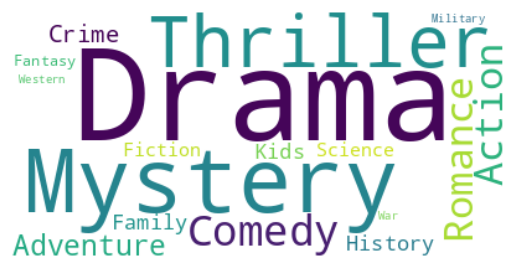

In [ ]:
#Let's Visvalize it using word cloud
text1 = " ".join(genre for genre in movie_data_fil_copy['Movie Genres'])

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that in most movies for the last 2 years and having ratings of 7 or more, have the genre of Drama and then Mystery and thriller.

In [ ]:
tvshows_data_fil_copy['Tv Show Genres'] = tvshows_data_fil_copy['Tv Show Genres'].str.split(',')

In [ ]:
tvshows_data_fil_copy = tvshows_data_fil_copy.explode('Tv Show Genres')
tvshows_data_fil_copy.head(10)

,Tv Show Title,Tv Show Url,Tv Show Year,Tv Show Genres,Tv Show Runtime,Tv Show IMDb Ratings,Tv Show Age Rating,Tv Show Production Countries,Tv Show Streaming Service
0,Jack Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,Action & Adventure,48min,8.1,A,United States,Amazon Prime Video
0,Jack Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,Crime,48min,8.1,A,United States,Amazon Prime Video
0,Jack Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,Drama,48min,8.1,A,United States,Amazon Prime Video
0,Jack Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,Mystery & Thriller,48min,8.1,A,United States,Amazon Prime Video
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Crime,36min,8.5,Age ratings is not given,India,Amazon Prime Video
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Action & Adventure,36min,8.5,Age ratings is not given,India,Amazon Prime Video
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Drama,36min,8.5,Age ratings is not given,India,Amazon Prime Video
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Mystery & Thriller,36min,8.5,Age ratings is not given,India,Amazon Prime Video
3,Solo Leveling 2024,https://www.justwatch.com/in/tv-show/solo-leve...,2024,Animation,23min,8.4,Age ratings is not given,"Japan, South Korea",Crunchyroll
3,Solo Leveling 2024,https://www.justwatch.com/in/tv-show/solo-leve...,2024,Action & Adventure,23min,8.4,Age ratings is not given,"Japan, South Korea",Crunchyroll


In [ ]:
tvshows_data_fil_copy['Tv Show Genres'] = tvshows_data_fil_copy['Tv Show Genres'].apply(lambda x: x.strip())      # to remove spaces
genre_count_tv = tvshows_data_fil_copy['Tv Show Genres'].value_counts().sort_values(ascending=False)              # to show descending counts of each genre
genre_count_tv

Drama                 37
Action & Adventure    17
Mystery & Thriller    16
Crime                 12
Science-Fiction       12
Comedy                12
Fantasy               10
Animation              4
Romance                4
Kids & Family          2
Western                1
Horror                 1
History                1
Made in Europe         1
War & Military         1
Reality TV             1
Name: Tv Show Genres, dtype: int64

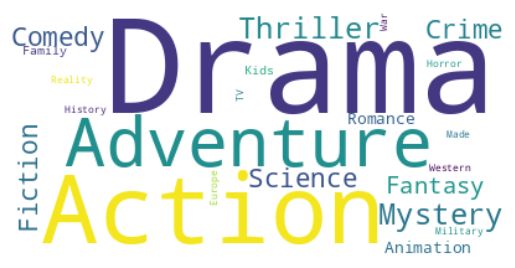

In [ ]:
#Let's Visvalize it using word cloud
text2 = " ".join(genre for genre in tvshows_data_fil_copy['Tv Show Genres'])

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that in most Tv shows for the last 2 years and having ratings of 7 or more, have the genre of Drama and then Action and adventure.

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
movie_streaming_ser = movie_data_fil['Movie Streaming Service'].value_counts()                 # to show descending counts of each genre
movie_streaming_ser

No details given.                     7
Amazon Prime Video                    5
Movie is available only in cinemas    4
Netflix                               4
Apple TV                              4
Apple TV Plus                         2
Hotstar                               2
Zee5                                  1
Amazon Video                          1
Voot                                  1
Name: Movie Streaming Service, dtype: int64

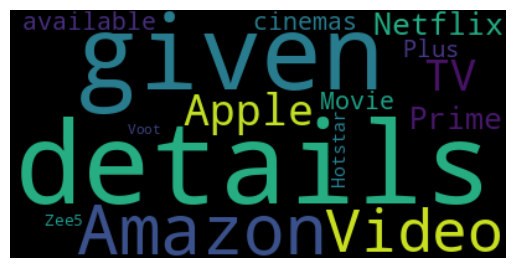

In [ ]:
#Let's Visvalize it using word cloud
text3 = " ".join(strm for strm in movie_data_fil['Movie Streaming Service'])

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text3)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In movies, for maximum movies details were not given. Apart from that, Netflix and Amazon Prime offers the most.

In [ ]:
TV_streaming_ser = tvshows_data_fil['Tv Show Streaming Service'].value_counts()               # to show descending counts of each genre
TV_streaming_ser

Amazon Prime Video    10
Hotstar                9
Netflix                5
Sony Liv               5
Jio Cinema             4
No details given.      3
Crunchyroll            2
Apple TV Plus          2
MX Player              2
Amazon miniTV          1
Name: Tv Show Streaming Service, dtype: int64

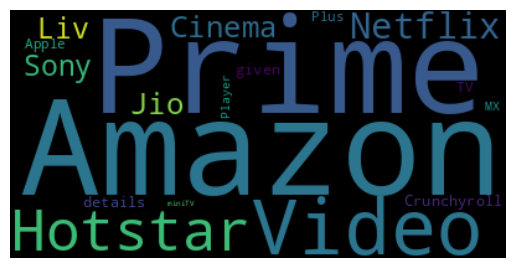

In [ ]:
#Let's Visvalize it using word cloud
text4 = " ".join(strm for strm in tvshows_data_fil['Tv Show Streaming Service'])

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text4)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In TV shows, Amazon Prime offers the most with 33 shows. Then comes Hotstar with 30 shows.

## **Task 3 :- Data Export**

In [ ]:
# final filtered movies data (movies from past two years and have rating of 7 and higher)
movie_data_fil.to_csv('Movies_Filtered_Data.csv')

# final filtered TV shows data (TV Shows from past two years and have rating of 7 and higher)
tvshows_data_fil.to_csv('TVshow_Filtered_Data.csv')

In [ ]:
avg_imdb_movies_df = pd.DataFrame({'Average of IMDB ratings for movies:': [avg_imdb_movies]})
avg_imdb_tv_df = pd.DataFrame({'Average of IMDB ratings for Tv Shows:': [avg_imdb_tv]})
avg_imdb_ratings_comb = pd.concat([avg_imdb_movies_df, avg_imdb_tv_df])

# Average IMDB Ratings for both in one df
avg_imdb_ratings_comb.to_csv('Average IMDB Ratings.csv')


genre_count_mov = pd.DataFrame(genre_count_mov)
genre_count_tv = pd.DataFrame(genre_count_tv)

# Top genres counts for movies and tv shows
genre_count_mov.to_csv('Top Genres in Movies.csv')
genre_count_tv.to_csv('Top Genres in TV Shows.csv')


movie_streaming_ser = pd.DataFrame(movie_streaming_ser)
TV_streaming_ser = pd.DataFrame(TV_streaming_ser)

# Top streaming platforms counts for movies and tv shows
movie_streaming_ser.to_csv('Top Streaming Services for Movies.csv')
TV_streaming_ser.to_csv('Top Streaming Services for TV Shows.csv')

# **Dataset Drive Link (View Access with Anyone) -**   https://drive.google.com/drive/folders/1tbkmuD-FKsYwPBFa93ML2r8iKNgHXEPD?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***